switch: 0.66563
stay: 0.33437


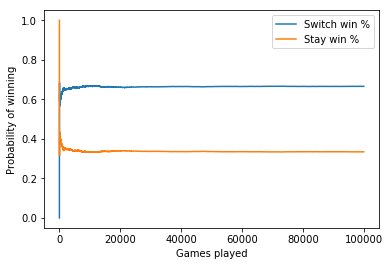

In [1]:
from random import shuffle, randrange
import matplotlib.pyplot as plt

def lprint(text):
    global show_text
    if show_text == True:
        print(text)
        
# Config
show_text = False

# Counters
switch_win = 0
stay_win = 0

win_ratios = []

for _ in range(100000):
    # Initialize problem
    x = [1, 0, 0]
    state = [i for i in range(len(x))]
    shuffle(x)
    lprint("Host: Pick a door")

    # Choose door
    guess = randrange(0, 2)
    state.remove(guess)
    lprint("Player: I pick door " + str(guess))

    # Game show host opens door with goat
    goat_indices = [idx for idx, value in enumerate(x) if value == 0 and idx != guess]
    open_door_idx = randrange(0, len(goat_indices))
    open_door = goat_indices[open_door_idx]
    state.remove(open_door)
    lprint("Host: That's a good guess! Before we look behind your door, let's see what's behind door " + str(open_door))
    lprint(":" + str(x[open_door]) + " revealed:")
    lprint("Host: Would you like to stick with door " + str(guess) + " or switch to door " + str(state[0]))

    if x[guess] == 1:
        lprint("Stay to win")
        stay_win += 1
    else:
        lprint("Switch to win")
        switch_win += 1
        
    win_ratios.append((switch_win/(switch_win + stay_win), stay_win/(switch_win + stay_win)))
            
print("switch:", switch_win/(switch_win + stay_win))
print("stay:", stay_win/(switch_win + stay_win))

switch_points = [(x, y[0]) for x, y in enumerate(win_ratios)]
stay_points = [(x, y[1]) for x, y in enumerate(win_ratios)]
x, = plt.plot(*zip(*switch_points))
y, = plt.plot(*zip(*stay_points))
plt.legend([x, y], ["Switch win %", "Stay win %"])
plt.xlabel('Games played')
plt.ylabel('Probability of winning')
plt.show()